<a href="https://colab.research.google.com/github/Raisler/DataScience_Portfolio/blob/master/TemperatureAnalisys/Temperatures_BH_MG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![temperature](https://images.vexels.com/media/users/3/144260/isolated/lists/d606d19b021fd53d278b26a11a4b468f-icone-de-temperatura-feber.png)
# **TEMPERATURA**

> Temperatura é um tipo de dado muito legal pra se trabalhar ou buscar aprendizado com muito prática, ele pode ser float, inteiro, celsius ou fahrenheit, etc, e não é tão difícil de enteder.
```
print('Hello Data')
```
> Este notebook é sobre um projeto prático de preparação de dados, e na primeira prática, será usado o dataset localizado no link abaixo. Problemas? raisler.dev@gmail.com 

[Link Dataset](https://data.world/data-society/global-climate-change-data)



--------------

@Author: Raisler Voigt


# Objetivos


> Objetivo 1: O dataset são sobre vários estados de vários países, abaixo tentarei entender quais são os países e quais são os estados, o objetivo será pegar dois estados e comparar a temperatura deles desde X ano, como a industrialização cresceu significativamente em 1960, provável que seja de 1960.

> Objetivo 2: Prever utilizando algum método de previsão temporal ou qualquer outro método em dois estados, e depois fazer uma comparação entre os dois com essas previsões.

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     | 43.8MB 950kB/s
     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 604kB 19.9MB/s 
     |████████████████████████████████| 3.1MB 35.5MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 296kB 50.5MB/s 


In [2]:
# Data Structure 
import numpy as np 
import pandas as pd

# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

# Entendendo & Carregando os dados


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Raisler/DataScience_Portfolio/master/TemperatureAnalisys/GlobalLandTemperaturesByState.csv')
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil


In [4]:
df.describe() # Aqui eu quero entender os dados da maneira mais simples e rápida possível

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [5]:
df['Country'].value_counts() # Vendo os estados existentes em nosso dateset

Russia           254972
United States    149745
India             86664
China             68506
Canada            35358
Brazil            34328
Australia         16102
Name: Country, dtype: int64

In [6]:
Brazil = df['Country'] == 'Brazil'
Brazil = df[Brazil]
Brazil

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
556546,2013-05-01,26.605,0.768,Tocantins,Brazil
556547,2013-06-01,26.646,0.834,Tocantins,Brazil
556548,2013-07-01,26.432,1.003,Tocantins,Brazil
556549,2013-08-01,27.276,0.898,Tocantins,Brazil


In [7]:
# Criado o Dataset apenas com o Brazil, veremos os estados disponíveis
Brazil['State'].value_counts()

Roraima                2277
Alagoas                2181
Mato Grosso Do Sul     2181
Distrito Federal       2181
Mato Grosso            2181
Pernambuco             2181
Santa Catarina         2181
Rio De Janeiro         2181
Bahia                  2181
Sergipe                2181
Rio Grande Do Sul      2181
Tocantins              2181
Minas Gerais           2181
Amazonas               2025
Rio Grande Do Norte    1953
Acre                   1901
Name: State, dtype: int64

In [8]:
# Agora um dataset apenas com o estado escolhido
Bahia = df['State'] == 'Bahia'
Bahia = Brazil[Bahia]
Bahia.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
50081,1832-01-01,24.522,1.436,Bahia,Brazil
50082,1832-02-01,24.477,2.395,Bahia,Brazil
50083,1832-03-01,24.264,1.475,Bahia,Brazil


In [9]:
# Como não precisamos e nem faz sentido ter a coluna State & country (só temos Bahia) vou retirar para economizar espaço.

Bahia.drop(inplace = True, columns= ['State', 'Country', 'AverageTemperatureUncertainty'])
Bahia.head(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dt,AverageTemperature
50081,1832-01-01,24.522
50082,1832-02-01,24.477
50083,1832-03-01,24.264


In [10]:
Bahia['dt'] = pd.to_datetime(Bahia['dt'], format = '%Y-%m-%d')
Bahia.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dt                    datetime64[ns]
AverageTemperature           float64
dtype: object

In [11]:
Bahia.index = Bahia['dt']
Bahia.head(3)

,dt,AverageTemperature
dt,,
1832-01-01,1832-01-01,24.522
1832-02-01,1832-02-01,24.477
1832-03-01,1832-03-01,24.264


# Transformando tipo dos dados

> Fica dificil fazer cálculo se meu número na realidade é uma string, por exemplo: Se eu tenho uma coluna de notas do enem e quero fazer a média dessas notas com determinada condição, essa nota vai de 0 a 10, porém ela é uma string, e se for string, quando eu fizer entrada: 10+10, a saída será "1010", se eu utilizar uma biblioteca, é provável que ocorra um erro.

> Geralmente se faz análises temporais, vendas, temperatura ao longo do tempo(nosso caso), mortes por mês, etc, porém a data geralmente vai estar como string, porém eu preciso que ela seja do tipo datetime (sim, esse tipo existe), e mais uma vez, o Pandas possui uma funcionalidade que converte dados de um tipo para outro.

In [12]:
Bahia.drop(['dt'], axis = 1, inplace = True)
Bahia.head(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,AverageTemperature
dt,
1832-01-01,24.522
1832-02-01,24.477
1832-03-01,24.264


In [13]:
recente = Bahia.index > '1960-1-1'
Bahia = Bahia[recente]
Bahia

,AverageTemperature
dt,
1960-02-01,25.602
1960-03-01,24.806
1960-04-01,24.061
1960-05-01,23.803
1960-06-01,22.398
...,...
2013-05-01,24.843
2013-06-01,23.998
2013-07-01,23.554


# Repetindo o Processo para a criação do novo dataset 
# Minas Gerais e suas médias de temperatura desde 1960

In [14]:
MG = Brazil['State'] == 'Minas Gerais'
MG = Brazil[MG]
MG['State'].value_counts()

Minas Gerais    2181
Name: State, dtype: int64

In [15]:
MG.drop(columns = ['Country', 'State', 'AverageTemperatureUncertainty'], inplace = True)
MG['dt'] = pd.to_datetime(MG['dt'], format = '%Y-%m-%d')
MG.index = MG['dt']
MG['date'] = MG['dt']
MG.drop(['date', 'dt'], axis = 1, inplace = True)
# Desde 1960
mask1 = MG.index > '1960-1-1'
MG = MG[mask1]
MG

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,AverageTemperature
dt,
1960-02-01,23.774
1960-03-01,23.437
1960-04-01,21.502
1960-05-01,19.887
1960-06-01,19.018
...,...
2013-05-01,21.581
2013-06-01,21.027
2013-07-01,20.529


# Verificação de Valores

> Nessa etapa verificamos se há valores ausentes, duplicados, fora do padrão, etc em nosso dataset, para isso a biblioteca pandas oferece várias ferramentas. 

> Poderia ter sido feito antes da criação de novos datasets, mas tudo depende do objetivo e de como o processo irá se comportar em cada tipo de objetivo.

Exemplos: 

```
df.isnull()   # Retornará True para a existência de valores nulos ou ausentes.
```

![](https://miro.medium.com/max/154/1*6Jq1ScawKkLHN-uo5RGtYQ.png)

In [16]:
# Agora temos dois datasets diferentes mas de proporções parecidas
# Para conferir:

print('''Bahia

''', Bahia.describe(), ''' 

Minas Gerais

''', MG.describe())

Bahia

        AverageTemperature
count          643.000000
mean            24.565910
std              1.253624
min             21.264000
25%             23.684000
50%             24.791000
75%             25.435500
max             27.114000  

Minas Gerais

        AverageTemperature
count          643.000000
mean            22.405561
std              1.733030
min             18.011000
25%             20.995500
50%             22.774000
75%             23.763000
max             25.613000


In [17]:
print(Bahia.isnull().sum(),'''

''', MG.isnull().sum()) # Vendo quantos valores nulos temos

AverageTemperature    1
dtype: int64 

 AverageTemperature    1
dtype: int64


In [18]:
# Como só temos apenas um valor nulo vamos ver onde ele está, se for a mesma posição podemos excluir!
# Se forem posições diferentes coloquei a média, já que é apenas um valor nulo

bool_series_Bahia = pd.isnull(Bahia['AverageTemperature']) 
Bahia[bool_series_Bahia]

,AverageTemperature
dt,
2013-09-01,NaN


In [19]:
bool_series_MG = pd.isnull(MG['AverageTemperature']) 
MG[bool_series_MG]

,AverageTemperature
dt,
2013-09-01,NaN


In [20]:
# Como é a mesma data e não nos importa ter a última linha do nosso dataset, vou remover

Bahia.dropna(inplace = True)
MG.dropna(inplace = True)
print(Bahia.isnull().sum(),'''

''', MG.isnull().sum()) 

AverageTemperature    0
dtype: int64 

 AverageTemperature    0
dtype: int64


# Bahia vs Minas Gerais


Text(0.5, 1.0, 'Média de Temperatura: MG vs BH')

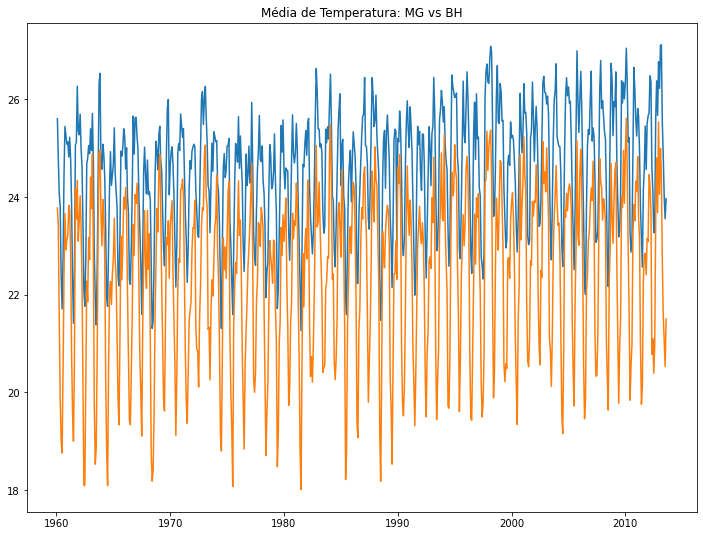

In [21]:
plt.figure(figsize=[12, 9])
x = Bahia.index
plt.plot(x, Bahia['AverageTemperature'])
plt.plot(x, MG['AverageTemperature'] )
plt.title('Média de Temperatura: MG vs BH')

Text(0.5, 1.0, 'Média de Temperatura: MG vs BH')

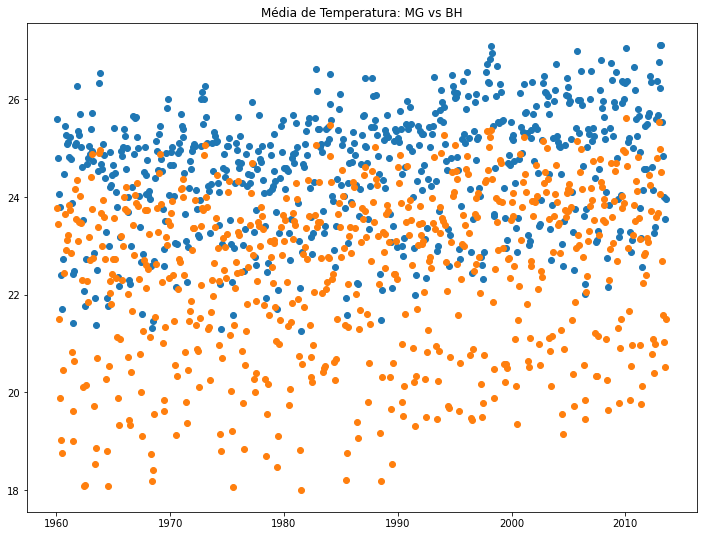

In [22]:
plt.figure(figsize=[12, 9])
x = Bahia.index
plt.scatter(x, Bahia['AverageTemperature'])
plt.scatter(x, MG['AverageTemperature'] )
plt.title('Média de Temperatura: MG vs BH')

# Previsões

In [23]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.3MB/s 
     |████████████████████████████████| 2.1MB 39.2MB/s 
     |████████████████████████████████| 808kB 46.5MB/s 
     |████████████████████████████████| 8.7MB 21.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [24]:
from fbprophet import Prophet

In [25]:
m = Prophet() 

In [26]:
Bahia['ds'] = Bahia.index
Bahia['y'] = Bahia['AverageTemperature']
m.fit(Bahia)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = m.make_future_dataframe(periods=20, freq='MS')
future.tail()

,ds
658,2014-12-01
659,2015-01-01
660,2015-02-01
661,2015-03-01
662,2015-04-01


In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
643,2013-09-01,25.478887,24.837916,26.194558
644,2013-10-01,26.151572,25.408127,26.789628
645,2013-11-01,26.102331,25.420453,26.804051
646,2013-12-01,25.842325,25.172159,26.520187
647,2014-01-01,25.936122,25.262154,26.557546
648,2014-02-01,26.157838,25.503207,26.854260
649,2014-03-01,26.042067,25.369040,26.731589
650,2014-04-01,25.401867,24.683938,26.105136
651,2014-05-01,24.617864,23.935732,25.281351
652,2014-06-01,23.470749,22.785724,24.144860


In [29]:
from pmdarima.arima import auto_arima
ts = Bahia['AverageTemperature']
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dis

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  643
Model:             SARIMAX(4, 1, 3)x(2, 0, [1], 12)   Log Likelihood                -494.989
Date:                              Tue, 17 Nov 2020   AIC                           1013.978
Time:                                      13:10:57   BIC                           1067.553
Sample:                                           0   HQIC                          1034.770
                                              - 643                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.168e-05      0.000      0.304      0.761      -0.000       0.000
ar.L1         -0.5896      0.681     -0.866      0.387      -1.924       0.745
ar.L2          0.0547      0.465      0.118      0.906      -0.858       0.967
ar.L3          0.4418      0.440      1.004      0.316      -0.421       1.304
ar.L4         -0.0137      0.058     -0.237      0.813      -0.127       0.099
ma.L1          0.2107      0.678      0.311      0.756      -1.118       1.539
ma.L2         -0.4867      0.467     -1.042      0.297      -1.402       0.429
ma.L3         -0.6906      0.687     -1.005      0.315      -2.037       0.656
ar.S.L12       0.8254      0.058     14.188      0.000       0.711       0.939
ar.S.L24       0.1449      0.054      2.701      0.007       0.040       0.250
ma.S.L12      -0.7438      0.046    -16.189      0.000      -0.834      -0.654
sigma2         0.2696      0.016     17.080      0.000       0.239       0.301
===================================================================================
Ljung-Box (Q):                       58.26   Jarque-Bera (JB):                 2.07
Prob(Q):                              0.03   Prob(JB):                         0.36
Heteroskedasticity (H):               1.18   Skew:                            -0.08
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
next_12 = modelo_auto.predict(n_periods = 12)
# Visualização dos próximos 12 valores
next_12 

array([25.24727938, 26.09560721, 25.80284294, 25.7981739 , 25.87441578,
       26.04118025, 26.13357747, 25.47744462, 24.58510512, 23.73560211,
       23.29788116, 23.95205858])